# Haarcascades

In [1]:
# Imports
import cv2
import time
import matplotlib.pyplot as plt

In [2]:
# Load image
image = cv2.imread('../../data/smiling_person.jpg')

# Converting RGB image to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Show image
plt.imshow(image)
plt.show()

NameError: name 'img' is not defined

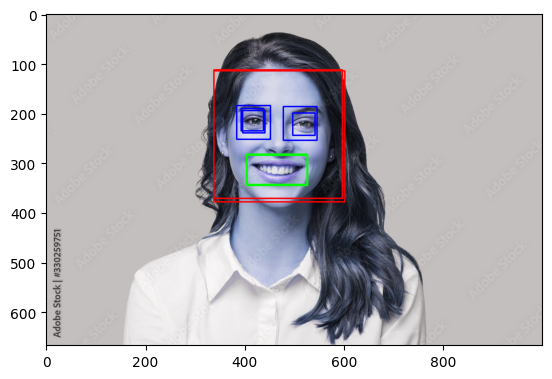

In [8]:
# Define HAAR Cascades
faceCascade = cv2.CascadeClassifier('../../data/haar_cascade_files/haarcascade_frontalface_default.xml')
smileCascade = cv2.CascadeClassifier('../../data/haar_cascade_files/haarcascade_smile.xml')
eyeCascade = cv2.CascadeClassifier('../../data/haar_cascade_files/haarcascade_eye.xml')

# Detect faces
faces = faceCascade.detectMultiScale(gray)

# For all faces in image
for (x, y, w, h) in faces:
    
    # Draw bounding box
    cv2.rectangle(img, (x, y), (x + w, y + h), (255, 0, 0), 2)

    # Define face images ROIs
    roi_gray = gray[y:y + h, x:x + w]
    roi_color = img[y:y + h, x:x + w]

    # Detect smile
    smile = smileCascade.detectMultiScale(roi_gray, scaleFactor=1.5, minNeighbors=50)

    # Detect eyes
    eye = eyeCascade.detectMultiScale(roi_gray, scaleFactor=1.5, minNeighbors=1)

    # Draw smile box
    for (xx, yy, ww, hh) in smile:
        cv2.rectangle(roi_color, (xx, yy), (xx + ww, yy + hh), (0, 255, 0), 2)

    # Draw 
    for (xx, yy, ww, hh) in eye:
        cv2.rectangle(roi_color, (xx, yy), (xx + ww, yy + hh), (0, 0, 255), 2)

    # Show result
    plt.imshow(img)
    plt.show()